<a href="https://colab.research.google.com/github/amballa-mahesh/ML_titanic_data-using-ensemble-model/blob/main/ML_titanic_dataset_all__modles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
import pandas as pd

Reading Data

In [244]:
df_train = pd.read_csv('/content/train.csv')

In [245]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [246]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Removing Unnecessary columns

In [247]:
df_train.drop(['PassengerId','Name','Ticket','Fare',"Cabin"],axis=1,inplace =True)

In [248]:
df_train.replace_index =True

In [249]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [250]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


Imputing Missing Values

In [251]:
mode_Embarked = df_train['Embarked'].mode()
mode_Embarked[0]

'S'

In [252]:
df_train['Embarked'].fillna(mode_Embarked[0],inplace =True)

In [253]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [254]:
import numpy as np

In [255]:
age_female = round(df_train['Age'][df_train['Sex']=='female'].mean(),2)
age_male   = round(df_train['Age'][df_train['Sex']=='male'].mean(),2)
age_male,age_female

(30.73, 27.92)

In [256]:
df_train['Age'].fillna('',inplace =True)

In [257]:
for i in range(0,df_train.shape[0]):
  if df_train.loc[i,'Sex']=='female' and df_train.loc[i,'Age']=='':
    df_train.loc[i,'Age'] = age_female
  elif df_train.loc[i,'Sex']=='male' and df_train.loc[i,'Age']=='':
    df_train.loc[i,'Age'] = age_male

In [258]:
df_train['Age'] = df_train['Age'].astype('float')

In [259]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


Creating OneHot Encoding

In [260]:
df_train = pd.get_dummies(df_train,columns= ['Pclass','Embarked','SibSp','Parch'],drop_first =True)

In [261]:
df_train['Sex'].replace({'male':0,'female':1},inplace=True)

In [262]:
df_train.head()

,Survived,Sex,Age,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,0,22.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,26.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,35.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Treating Outliers

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

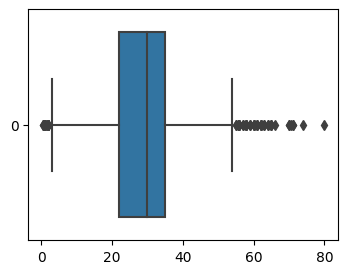

In [264]:
plt.figure(figsize=(4,3))
sns.boxplot(df_train['Age'],orient ='h')
plt.show()

In [265]:
age_q1 = np.percentile(df_train['Age'],25)
age_q3 = np.percentile(df_train['Age'],75)
age_iqr = age_q3 - age_q1
lw_limit = age_q1-(1.5*age_iqr)
up_limit = age_q3+(1.5*age_iqr)

lw_limit,up_limit

(2.5, 54.5)

In [266]:
for i in range(0,df_train.shape[0]):
  if df_train.loc[i,'Age'] < lw_limit:
    df_train.loc[i,'Age'] = lw_limit
  if df_train.loc[i,'Age'] > up_limit:
    df_train.loc[i,'Age']  = up_limit


<Axes: >

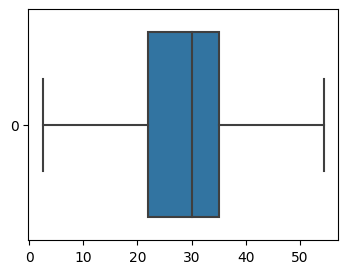

In [267]:
plt.figure(figsize=(4,3))
sns.boxplot(df_train['Age'],orient ='h')

Scaling the data using MinMax Scaling

In [268]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [269]:
scaler_age = np.round(scaler.fit_transform(np.array(df_train['Age']).reshape(-1,1)),4)

In [270]:
df_train['Age'] = scaler_age

In [271]:
df_train.head()

,Survived,Sex,Age,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,0,0.3750,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0.6827,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0.4519,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0.6250,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0.6250,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Spliting the data into Dependent and Independent Variables

In [272]:
X = df_train.drop('Survived',axis = 1, inplace =False)
y = df_train['Survived']

In [273]:
X.head()

,Sex,Age,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,0.3750,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0.6827,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0.4519,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.6250,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.6250,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


# Creation of Model Using GridsearchCV for hypertunning the parameters, and ROC curve, AUC for finding the thershold.(Logistic Regression)

In [274]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [275]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =123,stratify =y)

In [276]:
estimator = LogisticRegression()
C = np.array([0.0000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100])
param_grid = {'C':C}
neigh = GridSearchCV(estimator,param_grid,cv = 5,scoring= "roc_auc",return_train_score=True,verbose =2)

In [277]:
neigh.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ............................................C=1e-07; total time=   0.0s
[CV] END ............................................C=1e-07; total time=   0.0s
[CV] END ............................................C=1e-07; total time=   0.0s
[CV] END ............................................C=1e-07; total time=   0.0s
[CV] END ............................................C=1e-07; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ........................................

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-07, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02])},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [278]:
neigh.best_params_

{'C': 10.0}

In [279]:
neigh.best_params_['C']

10.0

In [280]:
results = pd.DataFrame.from_dict(neigh.cv_results_)

In [281]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012067,0.002558,0.005361,0.000044,0.0,{'C': 1e-07},0.904029,0.824897,0.846486,0.811448,...,0.836013,0.038197,7,0.821493,0.844096,0.839168,0.841783,0.848682,0.839044,0.009316
1,0.012404,0.006008,0.005133,0.000084,0.00001,{'C': 1e-05},0.904029,0.824897,0.846486,0.811448,...,0.836013,0.038197,7,0.821532,0.844096,0.839181,0.841939,0.848682,0.839086,0.009311
2,0.010338,0.001594,0.005331,0.000297,0.0001,{'C': 0.0001},0.904029,0.824897,0.846486,0.811448,...,0.836013,0.038197,7,0.821558,0.844069,0.839181,0.841900,0.848682,0.839078,0.009296
3,0.009307,0.000708,0.005246,0.000137,0.001,{'C': 0.001},0.904442,0.824690,0.847117,0.812079,...,0.836265,0.038358,6,0.821689,0.844226,0.839259,0.841952,0.848656,0.839157,0.009262
4,0.010135,0.000705,0.005284,0.000188,0.01,{'C': 0.01},0.906921,0.822417,0.846065,0.816077,...,0.837356,0.038367,5,0.823858,0.845259,0.838583,0.844209,0.852370,0.840856,0.009563
5,0.010948,0.000701,0.007576,0.003740,0.1,{'C': 0.1},0.914360,0.829855,0.855324,0.818182,...,0.843774,0.039449,4,0.833438,0.856393,0.847871,0.851995,0.862796,0.850499,0.009861
6,0.014407,0.002373,0.005116,0.000442,1.0,{'C': 1.0},0.921798,0.833781,0.853430,0.840699,...,0.852637,0.036919,3,0.846245,0.868783,0.861804,0.862097,0.872530,0.862292,0.008997
7,0.017625,0.001746,0.004954,0.000321,10.0,{'C': 10.0},0.917459,0.835640,0.844171,0.849327,...,0.853645,0.033256,1,0.850022,0.872363,0.868178,0.866370,0.875984,0.866584,0.008929
8,0.026939,0.006885,0.006256,0.001850,100.0,{'C': 100.0},0.910021,0.835227,0.846907,0.850168,...,0.853250,0.029857,2,0.852597,0.874075,0.870689,0.867307,0.876896,0.868313,0.008492


In [282]:
train_score = results['mean_train_score']
test_score  = results['mean_test_score']
C_values    = results['param_C']

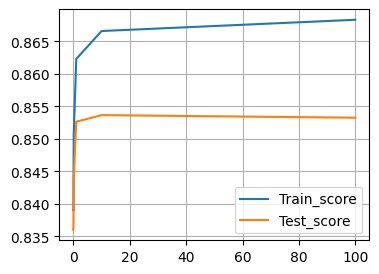

best_C :  {'C': 10.0}
best_score: 0.8536453484690162


In [283]:
plt.figure(figsize=(4,3))
plt.plot(C_values,train_score,label = "Train_score")
plt.plot(C_values,test_score,label = "Test_score")
plt.grid()
plt.legend()
plt.show()
print('best_C : ',neigh.best_params_)
print('best_score:', neigh.best_score_)

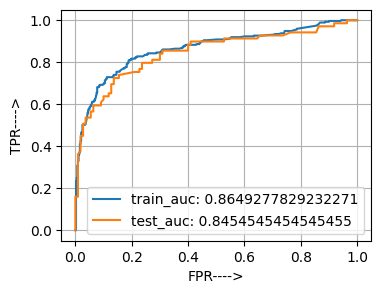

In [284]:
from sklearn.metrics import roc_curve, auc

neigh = LogisticRegression(C= neigh.best_params_['C'],penalty='l2')
neigh.fit(x_train,y_train)

y_train_pred = neigh.predict_log_proba(x_train)[:,1]
y_test_pred  = neigh.predict_log_proba(x_test)[:,1]

tr_fpr,tr_tpr,tr_thershold = roc_curve(y_train,y_train_pred)
ts_fpr,ts_tpr,ts_thershold = roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,3))
plt.plot(tr_fpr,tr_tpr,label = 'train_auc: '+ str(auc(tr_fpr,tr_tpr)))
plt.plot(ts_fpr,ts_tpr,label = 'test_auc: '+ str(auc(ts_fpr,ts_tpr)))
plt.xlabel('FPR---->')
plt.ylabel('TPR---->')
plt.grid()
plt.legend()
plt.show()

In [285]:
tr_ther = tr_thershold[np.argmax([tr_tpr*(1-tr_fpr)])]
tr_ther

-1.0260773866725121

In [286]:
train_preds = []
for i in y_train_pred:
  if i>=tr_ther:
    train_preds.append(1)
  else:
    train_preds.append(0)


In [287]:
print(accuracy_score(y_train,train_preds))
print(confusion_matrix(y_train,train_preds))

0.8103932584269663
[[356  83]
 [ 52 221]]


In [288]:
ts_ther = ts_thershold[np.argmax([ts_tpr*(1-ts_fpr)])]
ts_ther

-0.76615129877746

In [289]:
test_preds = []
for i in y_test_pred:
  if i>=ts_ther:
    test_preds.append(1)
  else:
    test_preds.append(0)

In [290]:
print(accuracy_score(y_test,test_preds))
print(confusion_matrix(y_test,test_preds))

0.8100558659217877
[[95 15]
 [19 50]]


In [291]:
scores= dict()
score_lr = accuracy_score(y_test,test_preds)
score_lr
scores['Logistic_regression']= round(score_lr,2)

# Creation of Model Using GridsearchCV for hypertunning the parameters, and ROC curve, AUC for finding the thershold.(MultinomialNB)

In [292]:
from sklearn.naive_bayes import MultinomialNB

In [293]:
estimator = MultinomialNB()
alphas = np.array([0.00001,0.0001,0.001,0.01,0.1,1,2,3,4,5,6,10,40,50,100])
param_grid = {'alpha':alphas}
neigh  = GridSearchCV(estimator,param_grid,cv= 5,scoring = 'roc_auc',return_train_score =True,verbose = 1)

In [294]:
neigh.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 2.e+00, 3.e+00,
       4.e+00, 5.e+00, 6.e+00, 1.e+01, 4.e+01, 5.e+01, 1.e+02])},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [295]:
neigh.best_params_

{'alpha': 1.0}

In [296]:
results = pd.DataFrame.from_dict(neigh.cv_results_)

In [297]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005348,0.002458,0.004090,0.001229,0.00001,{'alpha': 1e-05},0.893698,0.817252,0.849642,0.803241,...,0.831534,0.036381,13,0.826355,0.852002,0.849588,0.847969,0.853595,0.845902,0.009964
1,0.004491,0.001706,0.003537,0.000246,0.0001,{'alpha': 0.0001},0.893698,0.817252,0.849642,0.803241,...,0.831534,0.036381,13,0.826355,0.852002,0.849588,0.847969,0.853595,0.845902,0.009964
2,0.004866,0.001096,0.004762,0.001031,0.001,{'alpha': 0.001},0.893698,0.817252,0.849642,0.803241,...,0.831534,0.036381,13,0.826355,0.851989,0.849588,0.847943,0.853595,0.845894,0.009961
3,0.003925,0.000404,0.003709,0.000560,0.01,{'alpha': 0.01},0.893698,0.817252,0.849642,0.803451,...,0.831576,0.036349,12,0.826315,0.851924,0.849575,0.847917,0.853595,0.845865,0.009966
4,0.004327,0.000758,0.003705,0.000546,0.1,{'alpha': 0.1},0.894318,0.817252,0.849642,0.804924,...,0.831994,0.036337,10,0.825819,0.851780,0.849601,0.847904,0.853387,0.845698,0.010113
5,0.004387,0.000985,0.003988,0.000455,1.0,{'alpha': 1.0},0.908368,0.817252,0.847327,0.807870,...,0.834136,0.041519,1,0.822107,0.848787,0.848300,0.848164,0.851172,0.843706,0.010854
6,0.004267,0.000427,0.004218,0.000859,2.0,{'alpha': 2.0},0.908574,0.817252,0.852378,0.809133,...,0.833852,0.043612,2,0.822525,0.847912,0.845438,0.846967,0.849921,0.842553,0.010118
7,0.004330,0.000682,0.003655,0.000181,3.0,{'alpha': 3.0},0.908368,0.816839,0.853851,0.809133,...,0.833229,0.044667,5,0.821388,0.847846,0.843773,0.845874,0.849295,0.841635,0.010293
8,0.004265,0.000982,0.003753,0.000077,4.0,{'alpha': 4.0},0.907955,0.814979,0.852588,0.809554,...,0.832271,0.044924,7,0.820905,0.846735,0.842329,0.845237,0.849608,0.840963,0.010301
9,0.004379,0.001191,0.003936,0.000721,5.0,{'alpha': 5.0},0.906508,0.816219,0.851747,0.811237,...,0.832398,0.044103,6,0.819938,0.845990,0.841379,0.844951,0.849126,0.840277,0.010466


In [298]:
train_score = results['mean_train_score']
test_score  = results['mean_test_score']
alpha_values= results['param_alpha']

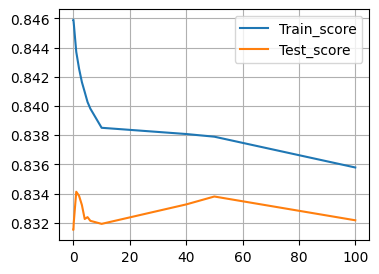

best alphas value is:  {'alpha': 1.0}


In [299]:
plt.figure(figsize=(4,3))
plt.plot(alpha_values,train_score,label= 'Train_score')
plt.plot(alpha_values,test_score, label= 'Test_score' )
plt.legend()
plt.grid()
plt.show()
print('best alphas value is: ',neigh.best_params_)

In [300]:
neigh = MultinomialNB(alpha=neigh.best_params_['alpha'])
neigh.fit(x_train,y_train)

MultinomialNB()

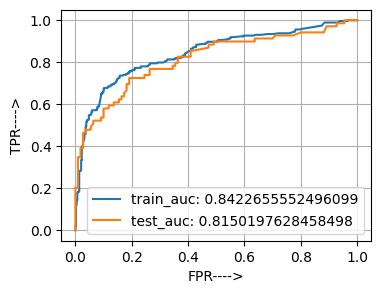

In [301]:
y_train_pred = neigh.predict_log_proba(x_train)[:,1]
y_test_pred  = neigh.predict_log_proba(x_test)[:,1]

tr_fpr,tr_tpr,tr_thershold = roc_curve(y_train,y_train_pred)
ts_fpr,ts_tpr,ts_thershold = roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,3))
plt.plot(tr_fpr,tr_tpr,label = 'train_auc: '+ str(auc(tr_fpr,tr_tpr)))
plt.plot(ts_fpr,ts_tpr,label = 'test_auc: '+ str(auc(ts_fpr,ts_tpr)))
plt.xlabel('FPR---->')
plt.ylabel('TPR---->')
plt.grid()
plt.legend()
plt.show()


In [302]:
tr_ther = tr_thershold[np.argmax((tr_tpr*(1-tr_fpr)))]
tr_ther

train_preds = []
for i in y_train_pred:
  if i>=tr_ther:
    train_preds.append(1)
  else:
    train_preds.append(0)

print(accuracy_score(y_train,train_preds))

0.8019662921348315


In [303]:
ts_ther = ts_thershold[np.argmax((ts_tpr*(1-ts_fpr)))]
ts_ther

test_preds = []
for i in y_test_pred:
  if i>=ts_ther:
    test_preds.append(1)
  else:
    test_preds.append(0)

print(accuracy_score(y_test,test_preds))

0.776536312849162


In [304]:
score_nb = accuracy_score(y_test,test_preds)
scores['Naive_bayes']= round(score_nb,2)

# Creation of Model Using GridsearchCV for hypertunning the parameters, and ROC curve, AUC for finding the thershold.(Support Vector Machine)

In [305]:
from sklearn.svm import SVC

In [306]:
estimator = SVC()
C      = np.array([0.0000001,0.00001,0.0001,0.001,0.01,0.1,1])
gamma  = np.array([0.0000001,0.00001,0.0001,0.001,0.01,0.1,1])
kernel = ['poly','rbf']
degree = np.array([1,2,3])
param_grid = {'C':C,"gamma":gamma,'kernel':kernel,'degree':degree}
neigh = GridSearchCV(estimator,param_grid,cv = 5,scoring ='roc_auc',return_train_score=True,verbose = 2)

In [307]:
neigh.fit(x_train,y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
[CV] END ........C=1e-07, degree=1, gamma=1e-07, kernel=poly; total time=   0.0s
[CV] END ........C=1e-07, degree=1, gamma=1e-07, kernel=poly; total time=   0.0s
[CV] END ........C=1e-07, degree=1, gamma=1e-07, kernel=poly; total time=   0.0s
[CV] END ........C=1e-07, degree=1, gamma=1e-07, kernel=poly; total time=   0.0s
[CV] END ........C=1e-07, degree=1, gamma=1e-07, kernel=poly; total time=   0.0s
[CV] END .........C=1e-07, degree=1, gamma=1e-07, kernel=rbf; total time=   0.0s
[CV] END .........C=1e-07, degree=1, gamma=1e-07, kernel=rbf; total time=   0.0s
[CV] END .........C=1e-07, degree=1, gamma=1e-07, kernel=rbf; total time=   0.0s
[CV] END .........C=1e-07, degree=1, gamma=1e-07, kernel=rbf; total time=   0.0s
[CV] END .........C=1e-07, degree=1, gamma=1e-07, kernel=rbf; total time=   0.0s
[CV] END ........C=1e-07, degree=1, gamma=1e-05, kernel=poly; total time=   0.0s
[CV] END ........C=1e-07, degree=1, gamma=1e-

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.e-07, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'degree': array([1, 2, 3]),
                         'gamma': array([1.e-07, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'kernel': ['poly', 'rbf']},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [308]:
neigh.best_params_

{'C': 0.1, 'degree': 2, 'gamma': 1.0, 'kernel': 'poly'}

In [309]:
results = pd.DataFrame.from_dict(neigh.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026081,0.005258,0.010915,0.001570,0.0,1,0.0,poly,"{'C': 1e-07, 'degree': 1, 'gamma': 1e-07, 'ker...",0.916012,...,0.840430,0.043175,77,0.827988,0.853080,0.847487,0.844977,0.856352,0.845977,0.009849
1,0.025384,0.000974,0.013679,0.000641,0.0,1,0.0,rbf,"{'C': 1e-07, 'degree': 1, 'gamma': 1e-07, 'ker...",0.910021,...,0.839256,0.041422,122,0.827008,0.851983,0.848587,0.844755,0.856326,0.845732,0.010109
2,0.022072,0.003021,0.009052,0.000933,0.0,1,0.00001,poly,"{'C': 1e-07, 'degree': 1, 'gamma': 1e-05, 'ker...",0.914979,...,0.840523,0.041936,63,0.828099,0.853401,0.847617,0.844437,0.857179,0.846147,0.010051
3,0.026986,0.002213,0.014392,0.001757,0.0,1,0.00001,rbf,"{'C': 1e-07, 'degree': 1, 'gamma': 1e-05, 'ker...",0.910434,...,0.839166,0.041393,128,0.826237,0.853329,0.847546,0.844430,0.856137,0.845536,0.010496
4,0.020949,0.001069,0.009627,0.000850,0.0,1,0.0001,poly,"{'C': 1e-07, 'degree': 1, 'gamma': 0.0001, 'ke...",0.915393,...,0.841707,0.041473,28,0.828027,0.852505,0.847936,0.844437,0.857603,0.846102,0.010061


In [310]:
train_score = results['mean_train_score']
test_score  = results['mean_test_score']
alpha_values= results['param_C']

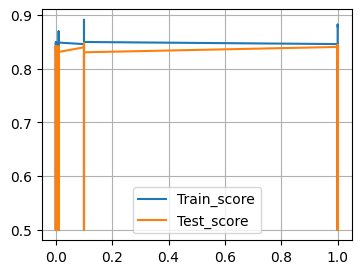

best alphas value is:  {'C': 0.1, 'degree': 2, 'gamma': 1.0, 'kernel': 'poly'}


In [311]:
plt.figure(figsize=(4,3))
plt.plot(alpha_values,train_score,label= 'Train_score')
plt.plot(alpha_values,test_score, label= 'Test_score' )
plt.legend()
plt.grid()
plt.show()
print('best alphas value is: ',neigh.best_params_)

In [312]:
neigh =SVC(gamma=neigh.best_params_['gamma'],
           kernel =neigh.best_params_['kernel'],
           degree = neigh.best_params_['degree'],
           C=neigh.best_params_['C'],probability=True)
neigh.fit(x_train,y_train)

SVC(C=0.1, degree=2, gamma=1.0, kernel='poly', probability=True)

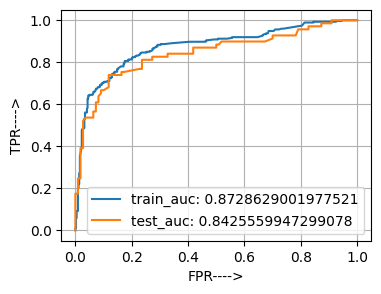

In [313]:
y_train_pred = neigh.predict_log_proba(x_train)[:,1]
y_test_pred  = neigh.predict_log_proba(x_test)[:,1]

tr_fpr,tr_tpr,tr_thershold = roc_curve(y_train,y_train_pred)
ts_fpr,ts_tpr,ts_thershold = roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,3))
plt.plot(tr_fpr,tr_tpr,label = 'train_auc: '+ str(auc(tr_fpr,tr_tpr)))
plt.plot(ts_fpr,ts_tpr,label = 'test_auc: '+ str(auc(ts_fpr,ts_tpr)))
plt.xlabel('FPR---->')
plt.ylabel('TPR---->')
plt.grid()
plt.legend()
plt.show()

In [314]:
tr_ther = tr_thershold[np.argmax([tr_tpr*(1-tr_fpr)])]
tr_ther

train_preds = []
for i in y_train_pred:
  if i>=tr_ther:
    train_preds.append(1)
  else:
    train_preds.append(0)

print(accuracy_score(y_train,train_preds))

0.8174157303370787


In [315]:
ts_ther = ts_thershold[np.argmax((ts_tpr*(1-ts_fpr)))]
ts_ther

test_preds = []
for i in y_test_pred:
  if i>=ts_ther:
    test_preds.append(1)
  else:
    test_preds.append(0)

print(accuracy_score(y_test,test_preds))

0.8268156424581006


In [316]:
score_svc = accuracy_score(y_test,test_preds)
scores['SVC'] = round(score_svc,2)

# Creation of Model Using GridsearchCV for hypertunning the parameters, and ROC curve, AUC for finding the thershold.(Decision Tree)

In [317]:
from sklearn.tree import DecisionTreeClassifier

In [318]:
estimator = DecisionTreeClassifier()
min_samples_split = np.array([3,5,7,9,11,15])
max_leaf_nodes   = np.array([5,10,15,20,25,30,35])
param_grid = {'min_samples_split':min_samples_split,'max_leaf_nodes':max_leaf_nodes}
neigh  = GridSearchCV(estimator,param_grid,cv =5, scoring ='roc_auc',return_train_score =True,verbose =2)

In [319]:
neigh.fit(x_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ..............max_leaf_nodes=5, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_samples_split=5; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_samples_split=5; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_samples_split=5; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_samples_split=5; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_samples_split=5; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_samples_split=7; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_sa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': array([ 5, 10, 15, 20, 25, 30, 35]),
                         'min_samples_split': array([ 3,  5,  7,  9, 11, 15])},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [320]:
neigh.best_params_

{'max_leaf_nodes': 10, 'min_samples_split': 3}

In [321]:
results = pd.DataFrame.from_dict(neigh.cv_results_)

In [322]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004740,0.001068,0.004084,0.001686,5,3,"{'max_leaf_nodes': 5, 'min_samples_split': 3}",0.866322,0.802583,0.805556,...,0.817092,0.026857,19,0.812724,0.828263,0.825554,0.820727,0.832784,0.82401,0.006864
1,0.004076,0.000303,0.003567,0.000663,5,5,"{'max_leaf_nodes': 5, 'min_samples_split': 5}",0.866322,0.802583,0.805556,...,0.817092,0.026857,19,0.812724,0.828263,0.825554,0.820727,0.832784,0.82401,0.006864
2,0.005392,0.001754,0.003834,0.001049,5,7,"{'max_leaf_nodes': 5, 'min_samples_split': 7}",0.866322,0.802583,0.805556,...,0.817092,0.026857,19,0.812724,0.828263,0.825554,0.820727,0.832784,0.82401,0.006864
3,0.004136,0.000332,0.004961,0.003644,5,9,"{'max_leaf_nodes': 5, 'min_samples_split': 9}",0.866322,0.802583,0.805556,...,0.817092,0.026857,19,0.812724,0.828263,0.825554,0.820727,0.832784,0.82401,0.006864
4,0.004259,0.000237,0.003628,0.000309,5,11,"{'max_leaf_nodes': 5, 'min_samples_split': 11}",0.866322,0.802583,0.805556,...,0.817092,0.026857,19,0.812724,0.828263,0.825554,0.820727,0.832784,0.82401,0.006864


In [323]:
train_score = results['mean_train_score']
test_score  = results['mean_test_score']
alpha_values= results['param_max_leaf_nodes']

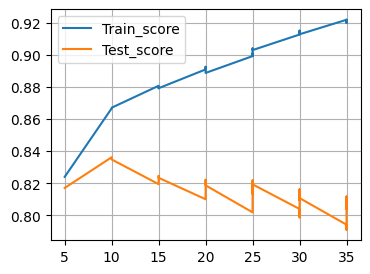

best alphas value is:  {'max_leaf_nodes': 10, 'min_samples_split': 3}


In [324]:
plt.figure(figsize=(4,3))
plt.plot(alpha_values,train_score,label= 'Train_score')
plt.plot(alpha_values,test_score, label= 'Test_score' )
plt.legend()
plt.grid()
plt.show()
print('best alphas value is: ',neigh.best_params_)

In [325]:
train_score = results['mean_train_score']
test_score  = results['mean_test_score']
alpha_values= results['param_min_samples_split']

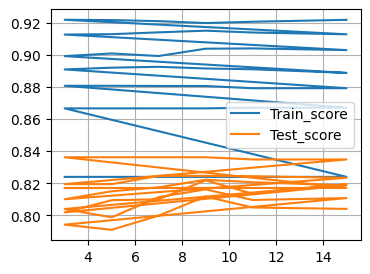

best alphas value is:  {'max_leaf_nodes': 10, 'min_samples_split': 3}


In [326]:
plt.figure(figsize=(4,3))
plt.plot(alpha_values,train_score,label= 'Train_score')
plt.plot(alpha_values,test_score, label= 'Test_score' )
plt.legend()
plt.grid()
plt.show()
print('best alphas value is: ',neigh.best_params_)

In [327]:
neigh = DecisionTreeClassifier(max_leaf_nodes =neigh.best_params_['max_leaf_nodes'],
                               min_samples_split=neigh.best_params_['min_samples_split'])
neigh.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, min_samples_split=3)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:965: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


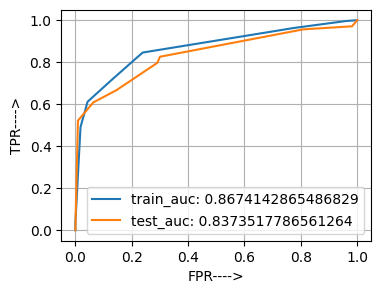

In [328]:
y_train_pred = neigh.predict_log_proba(x_train)[:,1]
y_test_pred  = neigh.predict_log_proba(x_test)[:,1]

tr_fpr,tr_tpr,tr_thershold = roc_curve(y_train,y_train_pred)
ts_fpr,ts_tpr,ts_thershold = roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,3))
plt.plot(tr_fpr,tr_tpr,label = 'train_auc: '+ str(auc(tr_fpr,tr_tpr)))
plt.plot(ts_fpr,ts_tpr,label = 'test_auc: '+ str(auc(ts_fpr,ts_tpr)))
plt.xlabel('FPR---->')
plt.ylabel('TPR---->')
plt.grid()
plt.legend()
plt.show()

In [329]:
tr_ther = tr_thershold[np.argmax([tr_tpr*(1-tr_fpr)])]
tr_ther

train_preds = []
for i in y_train_pred:
  if i>=tr_ther:
    train_preds.append(1)
  else:
    train_preds.append(0)

print(accuracy_score(y_train,train_preds))

0.7935393258426966


In [330]:
ts_ther = ts_thershold[np.argmax((ts_tpr*(1-ts_fpr)))]
ts_ther

test_preds = []
for i in y_test_pred:
  if i>=ts_ther:
    test_preds.append(1)
  else:
    test_preds.append(0)

print(accuracy_score(y_test,test_preds))

0.7486033519553073


In [331]:
score_dt = accuracy_score(y_test,test_preds)
scores['Decision_tree'] = round(score_dt,2)

# Creation of Model Using GridsearchCV for hypertunning the parameters, and ROC curve, AUC for finding the thershold.(Random Forest)

In [332]:
from sklearn.ensemble import RandomForestClassifier

In [333]:
estimator = RandomForestClassifier()
min_samples_split = np.array([3,5,7,9,11,15])
max_leaf_nodes    = np.array([5,10,15,20,25,30,35])
n_estimators      = np.array([25,30,35,50,75,100,150])
param_grid = {'min_samples_split':min_samples_split,'max_leaf_nodes':max_leaf_nodes,'n_estimators':n_estimators}
neigh  = GridSearchCV(estimator,param_grid,cv =5, scoring ='roc_auc',return_train_score =True,verbose =2)

In [334]:
neigh.fit(x_train,y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=25; total time=   0.1s
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=25; total time=   0.1s
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=25; total time=   0.1s
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=25; total time=   0.1s
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=25; total time=   0.1s
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=30; total time=   0.1s
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=30; total time=   0.1s
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=30; total time=   0.1s
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=30; total time=   0.1s
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=30; total time=   0.1s
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=35; total time=   0.1s
[CV] END max

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_leaf_nodes': array([ 5, 10, 15, 20, 25, 30, 35]),
                         'min_samples_split': array([ 3,  5,  7,  9, 11, 15]),
                         'n_estimators': array([ 25,  30,  35,  50,  75, 100, 150])},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [335]:
neigh.best_params_

{'max_leaf_nodes': 10, 'min_samples_split': 15, 'n_estimators': 30}

In [336]:
results = pd.DataFrame.from_dict(neigh.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.079712,0.006407,0.010351,0.001625,5,3,25,"{'max_leaf_nodes': 5, 'min_samples_split': 3, ...",0.910847,0.814360,...,0.840423,0.039523,275,0.851009,0.874023,0.864887,0.851006,0.866621,0.861509,0.009107
1,0.088051,0.005013,0.010145,0.000680,5,3,30,"{'max_leaf_nodes': 5, 'min_samples_split': 3, ...",0.906198,0.827583,...,0.843815,0.035513,221,0.853623,0.869096,0.856886,0.856288,0.873527,0.861884,0.007901
2,0.100257,0.009527,0.010906,0.000573,5,3,35,"{'max_leaf_nodes': 5, 'min_samples_split': 3, ...",0.901860,0.833678,...,0.841273,0.035221,266,0.845906,0.860294,0.847598,0.853380,0.871319,0.855699,0.009295
3,0.150317,0.010818,0.016126,0.001306,5,3,50,"{'max_leaf_nodes': 5, 'min_samples_split': 3, ...",0.910640,0.807645,...,0.842245,0.038281,254,0.844651,0.864849,0.868204,0.854193,0.873378,0.861055,0.010330
4,0.227156,0.016271,0.021670,0.001056,5,3,75,"{'max_leaf_nodes': 5, 'min_samples_split': 3, ...",0.914050,0.821694,...,0.843435,0.039563,235,0.851852,0.872161,0.860184,0.855377,0.878284,0.863572,0.010062


In [337]:
train_score = results['mean_train_score']
test_score  = results['mean_test_score']
alpha_values= results['param_n_estimators']

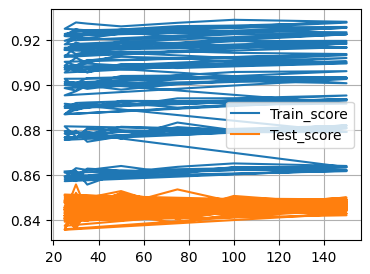

best alphas value is:  {'max_leaf_nodes': 10, 'min_samples_split': 15, 'n_estimators': 30}


In [338]:
plt.figure(figsize=(4,3))
plt.plot(alpha_values,train_score,label= 'Train_score')
plt.plot(alpha_values,test_score, label= 'Test_score' )
plt.legend()
plt.grid()
plt.show()
print('best alphas value is: ',neigh.best_params_)

In [339]:
neigh = RandomForestClassifier(max_leaf_nodes =neigh.best_params_['max_leaf_nodes'],
                               min_samples_split=neigh.best_params_['min_samples_split'],
                               n_estimators=neigh.best_params_['n_estimators'])
neigh.fit(x_train,y_train)

RandomForestClassifier(max_leaf_nodes=10, min_samples_split=15, n_estimators=30)

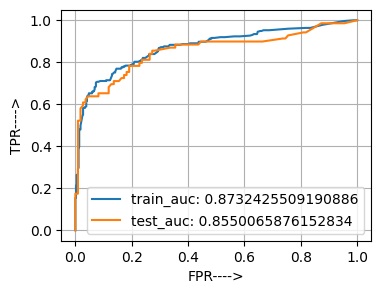

In [340]:
y_train_pred = neigh.predict_log_proba(x_train)[:,1]
y_test_pred  = neigh.predict_log_proba(x_test)[:,1]

tr_fpr,tr_tpr,tr_thershold = roc_curve(y_train,y_train_pred)
ts_fpr,ts_tpr,ts_thershold = roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,3))
plt.plot(tr_fpr,tr_tpr,label = 'train_auc: '+ str(auc(tr_fpr,tr_tpr)))
plt.plot(ts_fpr,ts_tpr,label = 'test_auc: '+ str(auc(ts_fpr,ts_tpr)))
plt.xlabel('FPR---->')
plt.ylabel('TPR---->')
plt.grid()
plt.legend()
plt.show()

In [341]:
tr_ther = tr_thershold[np.argmax([tr_tpr*(1-tr_fpr)])]
tr_ther

train_preds = []
for i in y_train_pred:
  if i>=tr_ther:
    train_preds.append(1)
  else:
    train_preds.append(0)

print(accuracy_score(y_train,train_preds))

0.8216292134831461


In [342]:
ts_ther = ts_thershold[np.argmax((ts_tpr*(1-ts_fpr)))]
ts_ther

test_preds = []
for i in y_test_pred:
  if i>=ts_ther:
    test_preds.append(1)
  else:
    test_preds.append(0)

print(accuracy_score(y_test,test_preds))

0.7988826815642458


In [343]:
score_rf = accuracy_score(y_test,test_preds)
scores['Random_forest'] = round(score_rf,2)

# Creation of Model Using GridsearchCV for hypertunning the parameters, and ROC curve, AUC for finding the thershold.(SGD Classifier)

In [344]:
from sklearn.linear_model import SGDClassifier

In [345]:
estimator = SGDClassifier(penalty='l2',loss='log',max_iter=500)
alphas =np.array([0.00001,0.0001,0.001,0.01,0.1,1,10,100])
param_grid = {'alpha':alphas}
neigh  = GridSearchCV(estimator,param_grid,cv = 5,scoring = 'roc_auc',return_train_score =True,verbose=2)

In [346]:
neigh.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/l

[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/l


[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/l

[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END ........................................alpha=100.0; total time=   0.0s
[CV] END ........................................alpha=100.0; total time=   0.0s
[CV] END ........................................alpha=100.0; total time=   0.0s
[CV] END ........................................alpha=100.0; total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/l

[CV] END ........................................alpha=100.0; total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


GridSearchCV(cv=5, estimator=SGDClassifier(loss='log', max_iter=500),
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [347]:
neigh.best_params_

{'alpha': 0.001}

In [348]:
results = pd.DataFrame.from_dict(neigh.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013478,0.003287,0.004636,0.000253,0.00001,{'alpha': 1e-05},0.889360,0.823037,0.786301,0.807239,...,0.821417,0.035955,7,0.829792,0.855753,0.833860,0.826445,0.840525,0.837275,0.010363
1,0.013292,0.004956,0.004829,0.000256,0.0001,{'alpha': 0.0001},0.910640,0.836260,0.839541,0.846170,...,0.850347,0.031442,2,0.845540,0.870481,0.863495,0.860243,0.873065,0.862565,0.009685
2,0.009569,0.003589,0.005975,0.001660,0.001,{'alpha': 0.001},0.923244,0.834401,0.851747,0.842803,...,0.853636,0.036752,1,0.846441,0.869527,0.862858,0.864067,0.873625,0.863304,0.009278
3,0.008145,0.001683,0.004684,0.000301,0.01,{'alpha': 0.01},0.917872,0.829029,0.853220,0.824495,...,0.845989,0.039044,3,0.837084,0.860510,0.850642,0.854597,0.864672,0.853501,0.009516
4,0.006464,0.000596,0.005307,0.000629,0.1,{'alpha': 0.1},0.907335,0.823657,0.846907,0.816919,...,0.838023,0.038367,4,0.823597,0.847363,0.838296,0.845998,0.853100,0.841671,0.010196


In [349]:
train_score = results['mean_train_score']
test_score  = results['mean_test_score']
alpha_values= results['param_alpha']

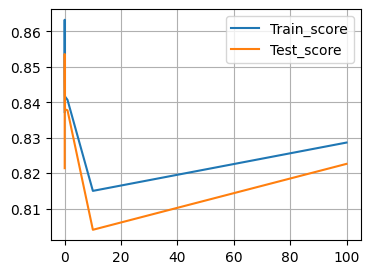

best alphas value is:  {'alpha': 0.001}


In [350]:
plt.figure(figsize=(4,3))
plt.plot(alpha_values,train_score,label= 'Train_score')
plt.plot(alpha_values,test_score, label= 'Test_score' )
plt.legend()
plt.grid()
plt.show()
print('best alphas value is: ',neigh.best_params_)

In [351]:
neigh = SGDClassifier(penalty='l2',loss='log',max_iter=500,alpha =neigh.best_params_['alpha'])
neigh.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(alpha=0.001, loss='log', max_iter=500)

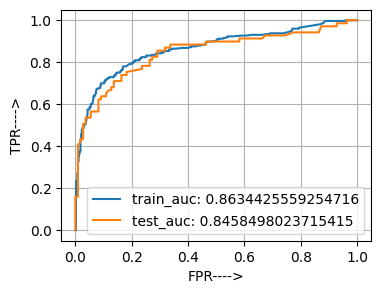

In [352]:
y_train_pred = neigh.predict_log_proba(x_train)[:,1]
y_test_pred  = neigh.predict_log_proba(x_test)[:,1]

tr_fpr,tr_tpr,tr_thershold = roc_curve(y_train,y_train_pred)
ts_fpr,ts_tpr,ts_thershold = roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,3))
plt.plot(tr_fpr,tr_tpr,label = 'train_auc: '+ str(auc(tr_fpr,tr_tpr)))
plt.plot(ts_fpr,ts_tpr,label = 'test_auc: '+ str(auc(ts_fpr,ts_tpr)))
plt.xlabel('FPR---->')
plt.ylabel('TPR---->')
plt.grid()
plt.legend()
plt.show()

In [353]:
tr_ther = tr_thershold[np.argmax([tr_tpr*(1-tr_fpr)])]
tr_ther

train_preds = []
for i in y_train_pred:
  if i>=tr_ther:
    train_preds.append(1)
  else:
    train_preds.append(0)

print(accuracy_score(y_train,train_preds))

0.8117977528089888


In [354]:
ts_ther = ts_thershold[np.argmax((ts_tpr*(1-ts_fpr)))]
ts_ther

test_preds = []
for i in y_test_pred:
  if i>=ts_ther:
    test_preds.append(1)
  else:
    test_preds.append(0)

print(accuracy_score(y_test,test_preds))

0.7988826815642458


In [355]:
score_sgd = accuracy_score(y_test,test_preds)
scores['SGD'] = round(score_sgd,2)

In [356]:
from sklearn.ensemble import GradientBoostingClassifier

In [357]:
estimator = GradientBoostingClassifier()
learning_rate = np.array([0.00001,0.0001,0.001,0.01,0.1,1,10])
n_estimators  = np.array([10,20,30,40,50,80,100])
param_grid = {'learning_rate':learning_rate,'n_estimators':n_estimators}
neigh = GridSearchCV(estimator,param_grid,cv=5,return_train_score =True,verbose=2)

In [358]:
neigh.fit(x_train,y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...............learning_rate=1e-05, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=1e-05, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=1e-05, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=1e-05, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=1e-05, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=1e-05, n_estimators=20; total time=   0.0s
[CV] END ...............learning_rate=1e-05, n_estimators=20; total time=   0.0s
[CV] END ...............learning_rate=1e-05, n_estimators=20; total time=   0.0s
[CV] END ...............learning_rate=1e-05, n_estimators=20; total time=   0.0s
[CV] END ...............learning_rate=1e-05, n_estimators=20; total time=   0.0s
[CV] END ...............learning_rate=1e-05, n_estimators=30; total time=   0.0s
[CV] END ...............learning_rate=1e-05, n_

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  80, 100])},
             return_train_score=True, verbose=2)

In [359]:
neigh.best_params_

{'learning_rate': 0.1, 'n_estimators': 30}

In [360]:
results = pd.DataFrame.from_dict(neigh.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017647,0.001372,0.003278,0.001050,0.00001,10,"{'learning_rate': 1e-05, 'n_estimators': 10}",0.615385,0.615385,0.619718,...,0.616576,0.002749,20,0.616872,0.616872,0.615789,0.615789,0.617544,0.616573,0.000685
1,0.028493,0.003326,0.002630,0.000056,0.00001,20,"{'learning_rate': 1e-05, 'n_estimators': 20}",0.615385,0.615385,0.619718,...,0.616576,0.002749,20,0.616872,0.616872,0.615789,0.615789,0.617544,0.616573,0.000685
2,0.040797,0.003515,0.002705,0.000140,0.00001,30,"{'learning_rate': 1e-05, 'n_estimators': 30}",0.615385,0.615385,0.619718,...,0.616576,0.002749,20,0.616872,0.616872,0.615789,0.615789,0.617544,0.616573,0.000685
3,0.054425,0.003413,0.003077,0.000709,0.00001,40,"{'learning_rate': 1e-05, 'n_estimators': 40}",0.615385,0.615385,0.619718,...,0.616576,0.002749,20,0.616872,0.616872,0.615789,0.615789,0.617544,0.616573,0.000685
4,0.061208,0.001496,0.003425,0.000906,0.00001,50,"{'learning_rate': 1e-05, 'n_estimators': 50}",0.615385,0.615385,0.619718,...,0.616576,0.002749,20,0.616872,0.616872,0.615789,0.615789,0.617544,0.616573,0.000685


In [361]:
train_score = results['mean_train_score']
test_score  = results['mean_test_score']
alpha_values= results['param_n_estimators']

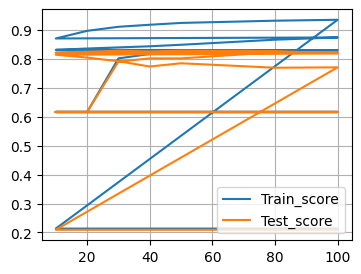

best alphas value is:  {'learning_rate': 0.1, 'n_estimators': 30}


In [362]:
plt.figure(figsize=(4,3))
plt.plot(alpha_values,train_score,label= 'Train_score')
plt.plot(alpha_values,test_score, label= 'Test_score' )
plt.legend()
plt.grid()
plt.show()
print('best alphas value is: ',neigh.best_params_)

In [363]:
neigh = GradientBoostingClassifier(learning_rate=neigh.best_params_['learning_rate'],
                                   n_estimators=neigh.best_params_['n_estimators'])
neigh.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=30)

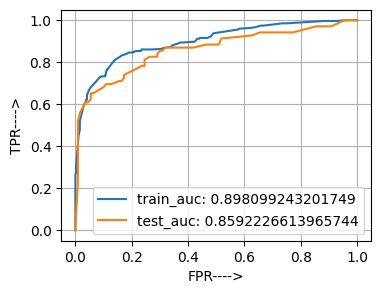

In [364]:
y_train_pred = neigh.predict_log_proba(x_train)[:,1]
y_test_pred  = neigh.predict_log_proba(x_test)[:,1]

tr_fpr,tr_tpr,tr_thershold = roc_curve(y_train,y_train_pred)
ts_fpr,ts_tpr,ts_thershold = roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,3))
plt.plot(tr_fpr,tr_tpr,label = 'train_auc: '+ str(auc(tr_fpr,tr_tpr)))
plt.plot(ts_fpr,ts_tpr,label = 'test_auc: '+ str(auc(ts_fpr,ts_tpr)))
plt.xlabel('FPR---->')
plt.ylabel('TPR---->')
plt.grid()
plt.legend()
plt.show()

In [365]:
tr_ther = tr_thershold[np.argmax([tr_tpr*(1-tr_fpr)])]
tr_ther

train_preds = []
for i in y_train_pred:
  if i>=tr_ther:
    train_preds.append(1)
  else:
    train_preds.append(0)

print(accuracy_score(y_train,train_preds))

0.8412921348314607


In [366]:
ts_ther = ts_thershold[np.argmax((ts_tpr*(1-ts_fpr)))]
ts_ther

test_preds = []
for i in y_test_pred:
  if i>=ts_ther:
    test_preds.append(1)
  else:
    test_preds.append(0)

print(accuracy_score(y_test,test_preds))

0.8156424581005587


In [367]:
score_gbc = accuracy_score(y_test,test_preds)
scores['GBC'] = round(score_gbc,2)

In [368]:
import xgboost
from xgboost import XGBClassifier

In [398]:
estimator = XGBClassifier()
learning_rate = np.array([0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
n_estimators  = np.array([10,20,30,40,50,80,100])
param_grid = {'learning_rate':learning_rate,'n_estimators':n_estimators}
neigh = GridSearchCV(estimator,param_grid,cv=5,return_train_score =True,verbose=2)

In [399]:
neigh.fit(x_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] END ...............learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=20; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=20; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=20; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=20; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=20; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=30; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': array([0.001, 0.01 , 0.1  , 0.2  , 0.3  , 0.4  , 0.5  , 0.6  , 0.7  ,
       0.8  , 0.9  , 1.   ]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  80, 100])},
             return_train_score=True, verbose=2)

In [400]:
neigh.best_params_

{'learning_rate': 0.3, 'n_estimators': 20}

In [401]:
results = pd.DataFrame.from_dict(neigh.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018741,0.001833,0.005243,0.000570,0.001,10,"{'learning_rate': 0.001, 'n_estimators': 10}",0.853147,0.818182,0.774648,...,0.801871,0.032691,30,0.826011,0.850615,0.842105,0.84386,0.854386,0.843395,0.009768
1,0.025603,0.001963,0.005979,0.001383,0.001,20,"{'learning_rate': 0.001, 'n_estimators': 20}",0.853147,0.818182,0.774648,...,0.801871,0.032691,30,0.826011,0.848858,0.842105,0.84386,0.854386,0.843044,0.009530
2,0.037691,0.008159,0.007228,0.004843,0.001,30,"{'learning_rate': 0.001, 'n_estimators': 30}",0.853147,0.818182,0.774648,...,0.801871,0.032691,30,0.826011,0.848858,0.842105,0.84386,0.854386,0.843044,0.009530
3,0.045031,0.003976,0.004927,0.000139,0.001,40,"{'learning_rate': 0.001, 'n_estimators': 40}",0.853147,0.818182,0.774648,...,0.801871,0.032691,30,0.826011,0.848858,0.842105,0.84386,0.854386,0.843044,0.009530
4,0.055609,0.004016,0.005247,0.000542,0.001,50,"{'learning_rate': 0.001, 'n_estimators': 50}",0.853147,0.818182,0.774648,...,0.801871,0.032691,30,0.826011,0.848858,0.842105,0.84386,0.854386,0.843044,0.009530


In [402]:
train_score = results['mean_train_score']
test_score  = results['mean_test_score']
alpha_values= results['param_learning_rate']

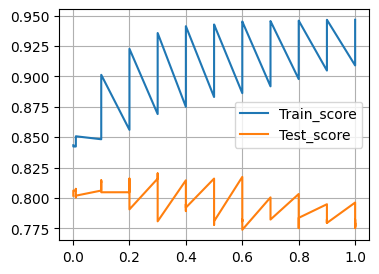

best alphas value is:  {'learning_rate': 0.3, 'n_estimators': 20}


In [403]:
plt.figure(figsize=(4,3))
plt.plot(alpha_values,train_score,label= 'Train_score')
plt.plot(alpha_values,test_score, label= 'Test_score' )
plt.legend()
plt.grid()
plt.show()
print('best alphas value is: ',neigh.best_params_)

In [404]:
neigh =  XGBClassifier(learning_rate=neigh.best_params_['learning_rate'],n_estimators=neigh.best_params_['n_estimators'])
neigh.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

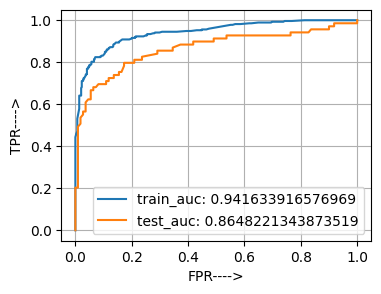

In [405]:
y_train_pred = neigh.predict_proba(x_train)[:,1]
y_test_pred  = neigh.predict_proba(x_test)[:,1]

tr_fpr,tr_tpr,tr_thershold = roc_curve(y_train,y_train_pred)
ts_fpr,ts_tpr,ts_thershold = roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,3))
plt.plot(tr_fpr,tr_tpr,label = 'train_auc: '+ str(auc(tr_fpr,tr_tpr)))
plt.plot(ts_fpr,ts_tpr,label = 'test_auc: '+ str(auc(ts_fpr,ts_tpr)))
plt.xlabel('FPR---->')
plt.ylabel('TPR---->')
plt.grid()
plt.legend()
plt.show()

In [406]:
tr_ther = tr_thershold[np.argmax([tr_tpr*(1-tr_fpr)])]
tr_ther

train_preds = []
for i in y_train_pred:
  if i>=tr_ther:
    train_preds.append(1)
  else:
    train_preds.append(0)

print(accuracy_score(y_train,train_preds))

0.8890449438202247


In [407]:
ts_ther = ts_thershold[np.argmax((ts_tpr*(1-ts_fpr)))]
ts_ther

test_preds = []
for i in y_test_pred:
  if i>=ts_ther:
    test_preds.append(1)
  else:
    test_preds.append(0)

print(accuracy_score(y_test,test_preds))

0.8156424581005587


In [408]:
score_xgbc = accuracy_score(y_test,test_preds)
scores['XGBC'] = round(score_xgbc,2)

In [409]:
from sklearn.ensemble import AdaBoostClassifier

In [410]:
estimator = AdaBoostClassifier()
learning_rate = np.array([0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
n_estimators  = np.array([10,20,30,40,50,80,100])
param_grid = {'learning_rate':learning_rate,'n_estimators':n_estimators}
neigh = GridSearchCV(estimator,param_grid,cv=5,return_train_score =True,verbose=2)

In [411]:
neigh.fit(x_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] END ...............learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=20; total time=   0.1s
[CV] END ...............learning_rate=0.001, n_estimators=20; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=20; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=20; total time=   0.1s
[CV] END ...............learning_rate=0.001, n_estimators=20; total time=   0.0s
[CV] END ...............learning_rate=0.001, n_estimators=30; total time=   0.1s
[CV] END ...............learning_rate=0.001, n_

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': array([0.001, 0.01 , 0.1  , 0.2  , 0.3  , 0.4  , 0.5  , 0.6  , 0.7  ,
       0.8  , 0.9  , 1.   ]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  80, 100])},
             return_train_score=True, verbose=2)

In [412]:
neigh.best_params_

{'learning_rate': 0.5, 'n_estimators': 40}

In [413]:
results = pd.DataFrame.from_dict(neigh.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025981,0.002911,0.004491,0.000678,0.001,10,"{'learning_rate': 0.001, 'n_estimators': 10}",0.832168,0.818182,0.774648,...,0.787816,0.031564,67,0.776801,0.780316,0.791228,0.796491,0.794737,0.787915,0.007903
1,0.043091,0.002220,0.006383,0.000520,0.001,20,"{'learning_rate': 0.001, 'n_estimators': 20}",0.832168,0.818182,0.774648,...,0.787816,0.031564,67,0.776801,0.780316,0.791228,0.796491,0.794737,0.787915,0.007903
2,0.065298,0.005242,0.007351,0.000037,0.001,30,"{'learning_rate': 0.001, 'n_estimators': 30}",0.832168,0.818182,0.774648,...,0.787816,0.031564,67,0.776801,0.780316,0.791228,0.796491,0.794737,0.787915,0.007903
3,0.078440,0.004320,0.009378,0.000429,0.001,40,"{'learning_rate': 0.001, 'n_estimators': 40}",0.832168,0.818182,0.774648,...,0.787816,0.031564,67,0.776801,0.780316,0.791228,0.796491,0.794737,0.787915,0.007903
4,0.110388,0.006189,0.011600,0.001101,0.001,50,"{'learning_rate': 0.001, 'n_estimators': 50}",0.832168,0.818182,0.774648,...,0.787816,0.031564,67,0.776801,0.780316,0.791228,0.796491,0.794737,0.787915,0.007903


In [414]:
train_score = results['mean_train_score']
test_score  = results['mean_test_score']
alpha_values= results['param_learning_rate']

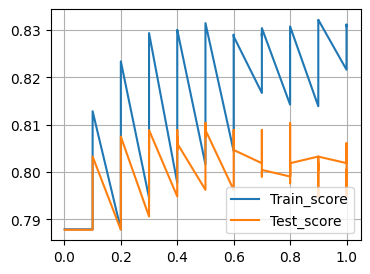

best alphas value is:  {'learning_rate': 0.5, 'n_estimators': 40}


In [415]:
plt.figure(figsize=(4,3))
plt.plot(alpha_values,train_score,label= 'Train_score')
plt.plot(alpha_values,test_score, label= 'Test_score' )
plt.legend()
plt.grid()
plt.show()
print('best alphas value is: ',neigh.best_params_)

In [416]:
neigh = AdaBoostClassifier(learning_rate=neigh.best_params_['learning_rate'],n_estimators=neigh.best_params_['n_estimators'])
neigh.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=40)

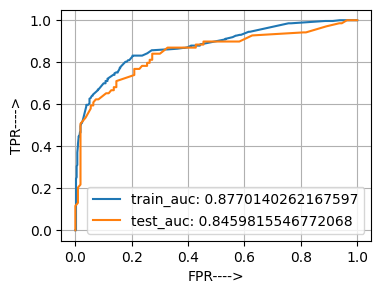

In [417]:
y_train_pred = neigh.predict_log_proba(x_train)[:,1]
y_test_pred  = neigh.predict_log_proba(x_test)[:,1]

tr_fpr,tr_tpr,tr_thershold = roc_curve(y_train,y_train_pred)
ts_fpr,ts_tpr,ts_thershold = roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,3))
plt.plot(tr_fpr,tr_tpr,label = 'train_auc: '+ str(auc(tr_fpr,tr_tpr)))
plt.plot(ts_fpr,ts_tpr,label = 'test_auc: '+ str(auc(ts_fpr,ts_tpr)))
plt.xlabel('FPR---->')
plt.ylabel('TPR---->')
plt.grid()
plt.legend()
plt.show()

In [418]:
tr_ther = tr_thershold[np.argmax([tr_tpr*(1-tr_fpr)])]
tr_ther

train_preds = []
for i in y_train_pred:
  if i>=tr_ther:
    train_preds.append(1)
  else:
    train_preds.append(0)

print(accuracy_score(y_train,train_preds))

0.8103932584269663


In [419]:
ts_ther = ts_thershold[np.argmax((ts_tpr*(1-ts_fpr)))]
ts_ther

test_preds = []
for i in y_test_pred:
  if i>=ts_ther:
    test_preds.append(1)
  else:
    test_preds.append(0)

print(accuracy_score(y_test,test_preds))

0.770949720670391


In [420]:
score_abc = accuracy_score(y_test,test_preds)
scores['ABC'] = round(score_abc,2)

# *Visualizing the Modle Scores*

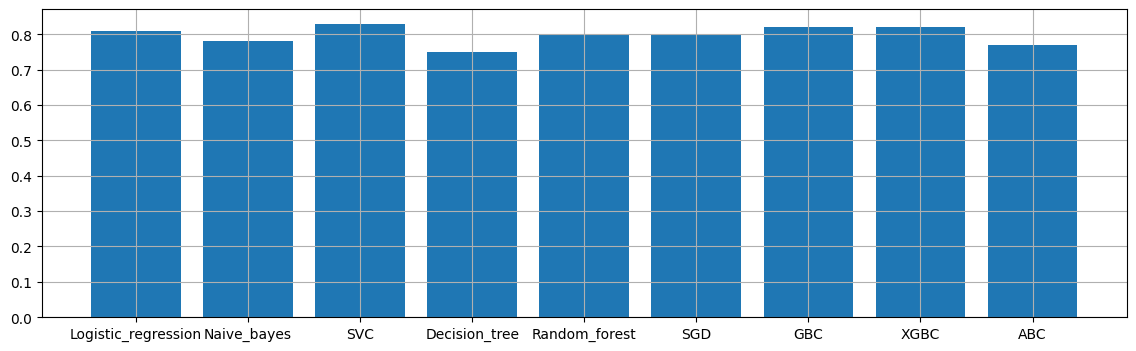

In [421]:
plt.figure(figsize= (14,4))
plt.bar(scores.keys(),scores.values())
plt.grid()
plt.show()

# *Creation of the Ensemble Model using all the above Models*

In [422]:
from sklearn.ensemble import VotingClassifier

In [423]:
# model1 = DecisionTreeClassifier(max_leaf_nodes=10, min_samples_split=3)
model2 = RandomForestClassifier(max_leaf_nodes=25, min_samples_split=15, n_estimators=25)
model3 = LogisticRegression(C= 10.0,penalty='l2')
# model4 = MultinomialNB(alpha= 1.0)
model5 = SGDClassifier(penalty='l2',loss='log',max_iter=500,alpha =0.001)
model6 = SVC(C=0.1, degree=2, gamma=1.0, kernel='poly', probability=True)        
model7 = GradientBoostingClassifier(learning_rate=0.1,n_estimators=80)
model8 = XGBClassifier(learning_rate=0.3, n_estimators=20)
# model9 = AdaBoostClassifier(learning_rate=0.5, n_estimators=40)

In [424]:
# estimators_all = [('DT', model1),('RF', model2),('LG', model3),('NB', model4),('SGD', model5),('SVC', model6),('GBC',model7),('XGBC',model8),('ABC',model8)]
estimators_all = [('RF', model2),('LG', model3),('SGD', model5),('SVC', model6),('GBC',model7),('XGBC',model8)]

In [425]:
model_final = VotingClassifier(estimators = estimators_all, voting='hard')

In [426]:
model_final.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(max_leaf_nodes=25,
                                                     min_samples_split=15,
                                                     n_estimators=25)),
                             ('LG', LogisticRegression(C=10.0)),
                             ('SGD',
                              SGDClassifier(alpha=0.001, loss='log',
                                            max_iter=500)),
                             ('SVC',
                              SVC(C=0.1, degree=2, gamma=1.0, kernel='poly',
                                  probability=True)),
                             ('GBC',
                              GradientBoostingClassifier(n_estimators=80)),
                             ('XGBC',
                              XGBClassifier...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.3, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=20, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [427]:
y_pred = model_final.predict(x_test)

# **Final Ensemble model performance**

In [428]:
print(accuracy_score(y_test,y_pred))

0.8156424581005587


In [429]:
print(confusion_matrix(y_test,y_pred))

[[101   9]
 [ 24  45]]


In [430]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.83      0.65      0.73        69

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



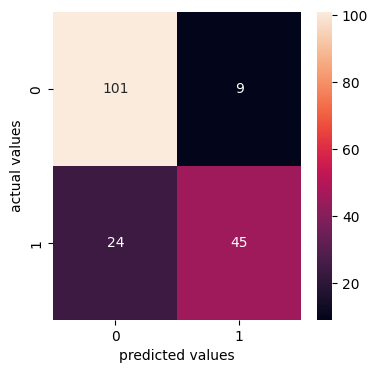

In [431]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt ='d')
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()